In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
data = pd.read_csv("Breast_cancer_data.csv")
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
# we have 5 features here. we have to predict if they have breast cancer or not.
# the features are continuous in nature.
# but naive bayes requires categorical features.


<Axes: >

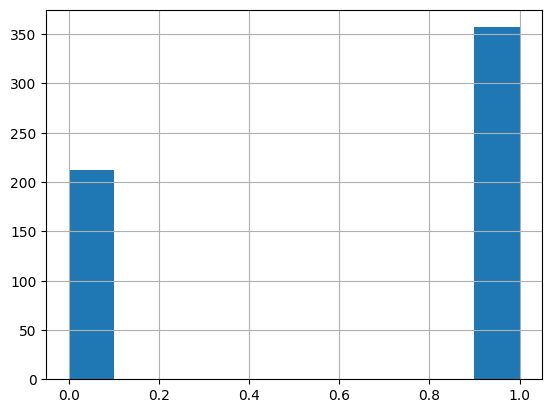

In [4]:
data['diagnosis'].hist()

In [5]:
# there are more 1s than 0s, data is little unbalaced.

In [6]:
#check if the features are independent. in naive bayes, features should be independent.
# check correlation between features.
corr = data.corr()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

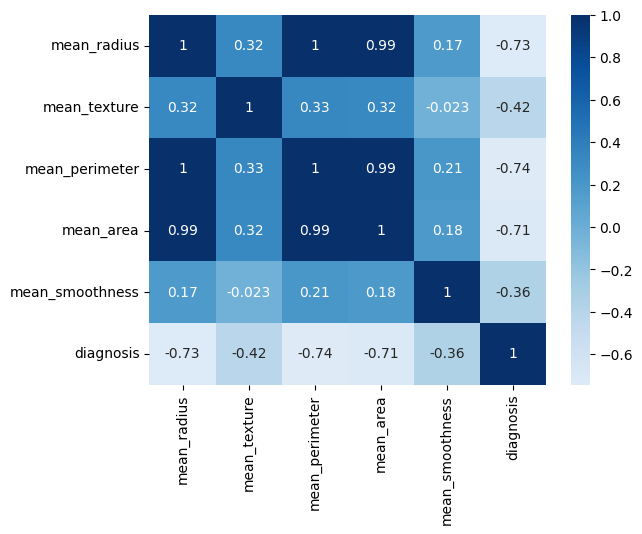

In [7]:
# corr using heatmap
# plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Blues',annot=True,center=0)

In [8]:
# here we see corr bw area, perimeter and radius
# so remove are and perimeter and just keep radius.
data = data[['mean_radius','mean_texture','mean_smoothness','diagnosis']]
data

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


In [9]:
da= data[data["mean_radius"]==17.99]
da

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.1184,0
408,17.99,20.66,0.1036,0


In [10]:
length_ex = len(data[data["mean_radius"]==17.99])
print(length_ex)

2


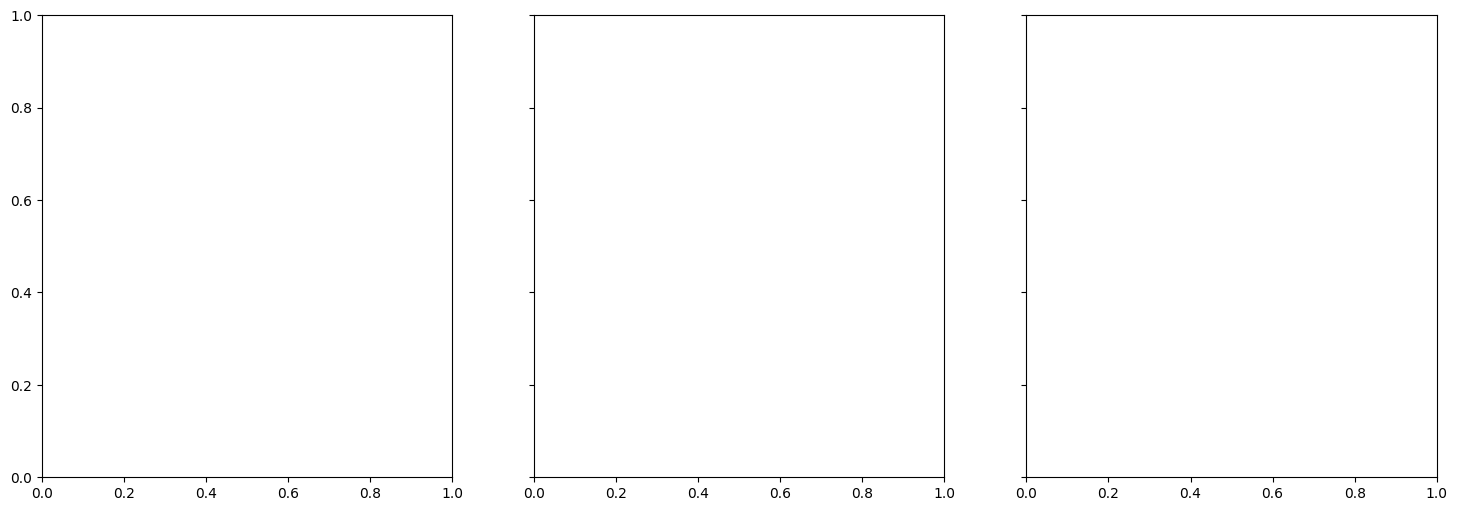

In [11]:
fig, axes = plt.subplots(1,3,figsize=(18,6), sharey=True)

<Axes: xlabel='mean_texture', ylabel='Count'>

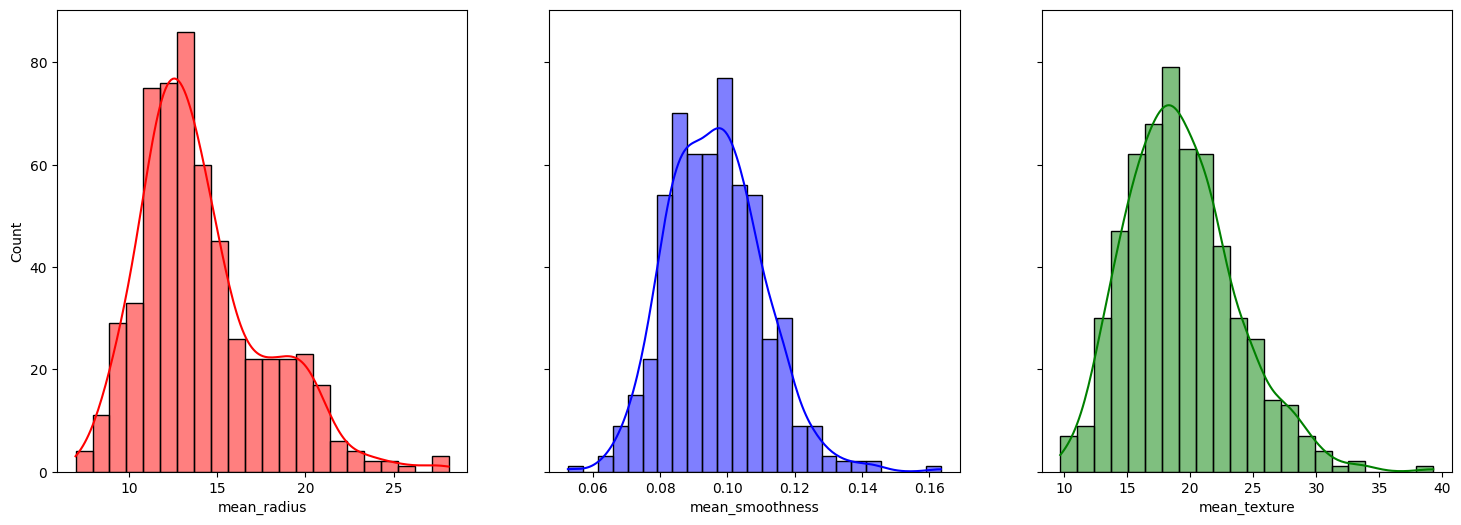

In [12]:

#fitting a normal distribution 
fig, axes = plt.subplots(1,3,figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0],x='mean_radius',kde=True,color='r')
sns.histplot(data, ax=axes[1],x='mean_smoothness',kde=True,color='b')
sns.histplot(data, ax=axes[2],x='mean_texture',kde=True,color='g')

In [13]:
# posterior(ans-> prob of x given y) = likelihood(p(xny)) * prior(p(y)) / evidence
# we can remove evidence 
def cal_prior(df,Y):
    global classes
    classes = sorted( list( df[Y].unique() ) )              # create a list of unique values in an atrribute of data
    prior = []                                              # create a list prior which stores prior prob of each datapoint in the given attribute
    for i in classes:
        # print("i= ",i)
        prior.append(len(df[df[Y]==i])/len(df))             # find prob by taking no of occurences of a datapoint / no of total unique datapoints
    print("classes = ",classes)
    return prior

# here we test the function, by creating a list l, which calls the function, and pass data, attribute into it
l = []
l = cal_prior(data,"mean_radius")



classes =  [6.981, 7.691, 7.729, 7.76, 8.196, 8.219, 8.571, 8.597, 8.598, 8.618, 8.671, 8.726, 8.734, 8.878, 8.888, 8.95, 9.0, 9.029, 9.042, 9.173, 9.268, 9.295, 9.333, 9.397, 9.405, 9.423, 9.436, 9.465, 9.504, 9.567, 9.606, 9.667, 9.668, 9.676, 9.683, 9.72, 9.731, 9.738, 9.742, 9.755, 9.777, 9.787, 9.847, 9.876, 9.904, 10.03, 10.05, 10.08, 10.16, 10.17, 10.18, 10.2, 10.25, 10.26, 10.29, 10.32, 10.44, 10.48, 10.49, 10.51, 10.57, 10.6, 10.65, 10.66, 10.71, 10.75, 10.8, 10.82, 10.86, 10.88, 10.9, 10.91, 10.94, 10.95, 10.96, 10.97, 11.04, 11.06, 11.08, 11.13, 11.14, 11.15, 11.16, 11.2, 11.22, 11.25, 11.26, 11.27, 11.28, 11.29, 11.3, 11.31, 11.32, 11.33, 11.34, 11.36, 11.37, 11.41, 11.42, 11.43, 11.45, 11.46, 11.47, 11.49, 11.5, 11.51, 11.52, 11.54, 11.57, 11.6, 11.61, 11.62, 11.63, 11.64, 11.66, 11.67, 11.68, 11.69, 11.7, 11.71, 11.74, 11.75, 11.76, 11.8, 11.81, 11.84, 11.85, 11.87, 11.89, 11.9, 11.93, 11.94, 11.95, 11.99, 12.0, 12.03, 12.04, 12.05, 12.06, 12.07, 12.1, 12.16, 12.18, 12.19

In [14]:
# testing the function
# printing prior list of probablities.
print(l)

[0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0035149384885764497, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.0017574692442882249, 0.00351493

In [15]:
def cal_likelihood_gaussian(df,feat_name,feat_val, Y, label):
    # extract all features.
    feat = list(df.columns) 
    # extract all data with given label.
    df   = df[df[Y]==label]
    # find mean and std.
    mean = df[feat_name].mean()
    std  = df[feat_name].std()
    # find prob using gaussian probablity density function of normal distribution.
    p_x_given_y = (1/(np.sqrt(2* np.pi)*std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
    return p_x_given_y

In [16]:
# cal_likelihood_gaussian(data,"mean_radius",)

In [17]:
a = [1]*5
a

[1, 1, 1, 1, 1]

In [18]:
featuress = list(data.columns)
featuress

['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']

In [19]:
labels = sorted( list( data["mean_radius"].unique() ) )
labels

[6.981,
 7.691,
 7.729,
 7.76,
 8.196,
 8.219,
 8.571,
 8.597,
 8.598,
 8.618,
 8.671,
 8.726,
 8.734,
 8.878,
 8.888,
 8.95,
 9.0,
 9.029,
 9.042,
 9.173,
 9.268,
 9.295,
 9.333,
 9.397,
 9.405,
 9.423,
 9.436,
 9.465,
 9.504,
 9.567,
 9.606,
 9.667,
 9.668,
 9.676,
 9.683,
 9.72,
 9.731,
 9.738,
 9.742,
 9.755,
 9.777,
 9.787,
 9.847,
 9.876,
 9.904,
 10.03,
 10.05,
 10.08,
 10.16,
 10.17,
 10.18,
 10.2,
 10.25,
 10.26,
 10.29,
 10.32,
 10.44,
 10.48,
 10.49,
 10.51,
 10.57,
 10.6,
 10.65,
 10.66,
 10.71,
 10.75,
 10.8,
 10.82,
 10.86,
 10.88,
 10.9,
 10.91,
 10.94,
 10.95,
 10.96,
 10.97,
 11.04,
 11.06,
 11.08,
 11.13,
 11.14,
 11.15,
 11.16,
 11.2,
 11.22,
 11.25,
 11.26,
 11.27,
 11.28,
 11.29,
 11.3,
 11.31,
 11.32,
 11.33,
 11.34,
 11.36,
 11.37,
 11.41,
 11.42,
 11.43,
 11.45,
 11.46,
 11.47,
 11.49,
 11.5,
 11.51,
 11.52,
 11.54,
 11.57,
 11.6,
 11.61,
 11.62,
 11.63,
 11.64,
 11.66,
 11.67,
 11.68,
 11.69,
 11.7,
 11.71,
 11.74,
 11.75,
 11.76,
 11.8,
 11.81,
 11.84,
 11.85,

In [20]:
likelihood = [1]*len(labels)
likelihood

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [21]:
def Naive_Bayes(df, X, Y):
    # get feature names
	features = list(df.columns)[:-1]
	# calculate prior
	prior = cal_prior(df, Y)
	# create prediction variable.
	Y_pred = []
	# loop over every data sample
	for x in X:
		labels = sorted( list( df[Y].unique() ) )
		likelihood = [1]*len(labels)

		for j in range(len(labels)):
			for i in range(len(features)):
				likelihood[j] *= cal_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
		
		#cal posterior prob
		post_prob = [1] * len(labels)
		for j in range(len(labels)):
			post_prob[j] = likelihood[j] * prior[j]
		
		Y_pred.append(np.argmax(post_prob))
	
	return np.array(Y_pred)

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=.2,random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values


In [23]:
X_test

array([[12.58   , 18.4    ,  0.08393],
       [14.76   , 14.74   ,  0.08875],
       [14.64   , 15.24   ,  0.1132 ],
       [12.65   , 18.17   ,  0.1076 ],
       [12.43   , 17.     ,  0.07557],
       [ 9.777  , 16.99   ,  0.1037 ],
       [28.11   , 18.47   ,  0.1142 ],
       [19.68   , 21.68   ,  0.09797],
       [19.55   , 23.21   ,  0.101  ],
       [10.26   , 14.71   ,  0.09882],
       [15.66   , 23.2    ,  0.1109 ],
       [15.22   , 30.62   ,  0.1048 ],
       [15.53   , 33.56   ,  0.1063 ],
       [12.8    , 17.46   ,  0.08044],
       [11.99   , 24.89   ,  0.103  ],
       [ 8.597  , 18.6    ,  0.1074 ],
       [10.18   , 17.53   ,  0.1061 ],
       [11.74   , 14.02   ,  0.07813],
       [12.88   , 28.92   ,  0.08123],
       [11.04   , 16.83   ,  0.1077 ],
       [15.85   , 23.95   ,  0.08401],
       [14.29   , 16.82   ,  0.06429],
       [14.53   , 19.34   ,  0.08388],
       [ 9.667  , 18.49   ,  0.08946],
       [13.62   , 23.23   ,  0.09246],
       [11.22   , 19.86  

In [24]:
Y_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [25]:
Y_pred = Naive_Bayes(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

classes =  [0, 1]
[[36  4]
 [ 0 74]]
0.9736842105263158
